## Monte Carlo Simulation

A Monte Carlo simulation is used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty.

### Importing Packages

In [7]:
import random 
import matplotlib.pyplot as plt
import numpy as np

### Dice Roll Function
We are going to use a simple dice roll game as an example. There are two fair dices, a player will win if he or she rolled the same number for both dices, else lose the bet. If he wins, he will get 4x the return.

In [8]:
def play_roll_dice():
    # random integer between 1 and 6 (uniform distribution)
    dice_a = random.randint(1,6)
    dice_b = random.randint(1,6)

    # determine win or lose
    return dice_a == dice_b    

### Inputs

In [9]:
simulations_count = 10000
max_iterations = 1000
starting_balance = 1000
bet = 1
win_multiplier = 4

### Simulation

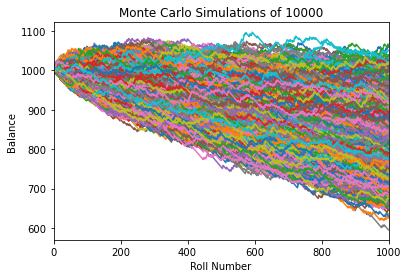

In [10]:
# Creating Figure for Simulation Balances
fig = plt.figure()
plt.title(f'Monte Carlo Simulations of {simulations_count}')
plt.xlabel("Roll Number")
plt.ylabel("Balance")
plt.xlim([0, max_iterations])

win_probability = []
end_balance = []

for _ in range(simulations_count):
    # result tracking
    balance = [starting_balance]
    num_rolls = [0]
    num_wins = 0

    # run simulation
    while num_rolls[-1] < max_iterations and balance[-1] > 0:
        result = play_roll_dice()

        if result:
            balance.append(balance[-1] + win_multiplier*bet)
            num_wins += 1
        else:
            balance.append(balance[-1] - bet)
        
        num_rolls.append(num_rolls[-1] +1)
    
    # add the result of simulation
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)

### Results

The mean of win probability after 10000 simulations: 0.16653479999999998


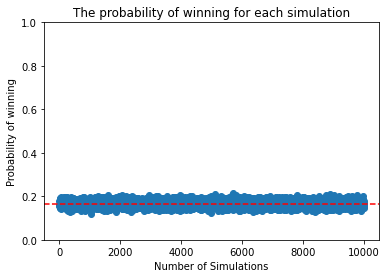

The average of end balance after 10000 simulations: 832.674


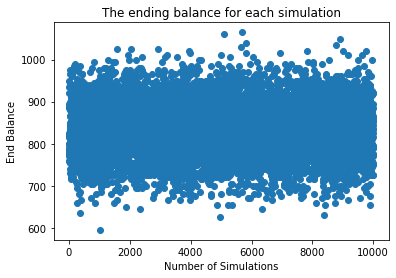

In [11]:
# Win Probability 
print(f'The mean of win probability after {simulations_count} simulations: {np.mean(win_probability)}')
plt.scatter(range(len(win_probability)),win_probability)
plt.title('The probability of winning for each simulation')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of winning')
plt.axhline(6/36, color = 'r', linestyle = '--') # The probability of getting same number for 2 dices
plt.ylim(0,1)
plt.show()


# Ending Balance
print(f'The average of end balance after {simulations_count} simulations: {np.mean(end_balance)}')
plt.scatter(range(len(end_balance)),end_balance)
plt.title('The ending balance for each simulation')
plt.xlabel('Number of Simulations')
plt.ylabel('End Balance')
plt.show()

### Conclusion

After the simulation, we found out that even with a win multiplier of 4, it is unlikely for that player to obtain an ending balance of more than his or her starting balance. We can further adjust the starting balance, win multiplier or bet to check for different results. In short, Monte Carlo Simulation is useful to check the outcome given a defined distribution